In [21]:
import pandas as pd

# 파일 경로와 데이터프레임 이름 매핑
file_paths = {
    "df_100_50": "//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_50/total/results/experiment_results.txt",
    "df_100_100": "//home/iai/Desktop/son/capstone/classimbalance/cifar100-lt/imb_fact_100/total/results/experiment_results.txt",
    "df_10_50": "//home/iai/Desktop/son/capstone/classimbalance/cifar10-lt/imb_fact_50/total/results/experiment_results.txt",
    "df_10_100": "//home/iai/Desktop/son/capstone/classimbalance/cifar10-lt/imb_fact_100/total/results/experiment_results.txt"
}

# 데이터프레임 저장용 딕셔너리
dataframes = {}

# 파일 읽기 및 데이터 타입 변환
for name, path in file_paths.items():
    # 파일 읽기
    df = pd.read_csv(path, sep=", ")
    
    # 데이터 타입 변환
    df["ACC Mean"] = df["ACC Mean"].astype(float)
    df["ACC Std"] = df["ACC Std"].astype(float)
    df["ECE Mean"] = df["ECE Mean"].astype(float)
    df["ECE Std"] = df["ECE Std"].astype(float)
    
    # 데이터프레임 저장
    dataframes[name] = df
    
    # 데이터 확인
    print(f"{name} DataFrame Head:")
    print(df.head(), "\n")

import matplotlib.pyplot as plt

# 데이터셋별로 분리하여 그래프 생성
def plot_dataset(df, top_5_normalized, bottom_5_normalized, dataset_name):
    plt.figure(figsize=(12, 8))

    # 모든 데이터 포인트 표시
    plt.scatter(df["ECE Mean"], df["ACC Mean"], color="gray", alpha=0.6, label="All Points")

    # Top 5 Harmonic Scores 강조
    plt.scatter(top_5_normalized["ECE Mean"], top_5_normalized["ACC Mean"], 
                color="blue", marker="^", s=150, label="Top 5 Scores")
    for _, row in top_5_normalized.iterrows():
        student_calibration_abbr = {
            "ALS": "ALS",
            "BalancedSoftmax": "BS",
            "ConfidencePenalty": "CP",
            "CE": "CE"
        }.get(row["Student Calibration"], row["Student Calibration"])
        label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
        plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

    # Bottom 5 Harmonic Scores 강조
    plt.scatter(bottom_5_normalized["ECE Mean"], bottom_5_normalized["ACC Mean"], 
                color="red", marker="v", s=150, label="Bottom 5 Scores")
    for _, row in bottom_5_normalized.iterrows():
        student_calibration_abbr = {
            "ALS": "ALS",
            "BalancedSoftmax": "BS",
            "ConfidencePenalty": "CP",
            "CE": "CE"
        }.get(row["Student Calibration"], row["Student Calibration"])
        label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
        plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

    # 그래프 설정
    plt.title(f"{dataset_name} ACC vs ECE", fontsize=16, fontweight="bold")
    plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
    plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12, loc="upper right")
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 데이터셋 정의
df_100_50 = dataframes["df_100_50"]
df_100_100 = dataframes["df_100_100"]
df_10_50 = dataframes["df_10_50"]
df_10_100 = dataframes["df_10_100"]

# 예제 데이터 준비 (필요시 데이터를 정확히 반영)
cifar_100_if_50 = df_100_50  # CIFAR-100 (IF=50) 데이터셋
cifar_100_if_100 = df_100_100  # CIFAR-100 (IF=100) 데이터셋
cifar_10_if_50 = df_10_50  # CIFAR-10 (IF=50) 데이터셋
cifar_10_if_100 = df_10_100  # CIFAR-10 (IF=100) 데이터셋


df_100_50 DataFrame Head:
  KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0       VKD               TNone                  CE  Mixup=False     39.94   
1       VKD               TNone                 ALS  Mixup=False     39.25   
2       VKD               TNone                  CP  Mixup=False     39.33   
3       VKD               TNone                  BS  Mixup=False     38.61   
4       VKD                TALS                  CE  Mixup=False     39.80   

   ACC Std  ECE Mean  ECE Std  
0     0.81    0.1611   0.0084  
1     1.42    0.1702   0.0084  
2     0.70    0.1992   0.0197  
3     0.36    0.1734   0.0171  
4     0.65    0.1741   0.0067   

df_100_100 DataFrame Head:
  KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
0       VKD               TNone                  CE  Mixup=False     38.42   
1       VKD               TNone                 ALS  Mixup=False     38.47   
2       VKD               TNone                  C

/tmp/ipykernel_1887882/3518178227.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=", ")
/tmp/ipykernel_1887882/3518178227.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=", ")
/tmp/ipykernel_1887882/3518178227.py:17: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path, sep=", ")
/tmp/ipykernel_1887882/3518178227.py:17: ParserWarning:

In [22]:
# 특정 데이터프레임 접근 예시
df_100_50 = dataframes["df_100_50"]
df_100_50

,KD Method,Teacher Calibration,Student Calibration,Mixup,ACC Mean,ACC Std,ECE Mean,ECE Std
0,VKD,TNone,CE,Mixup=False,39.94,0.81,0.1611,0.0084
1,VKD,TNone,ALS,Mixup=False,39.25,1.42,0.1702,0.0084
2,VKD,TNone,CP,Mixup=False,39.33,0.70,0.1992,0.0197
3,VKD,TNone,BS,Mixup=False,38.61,0.36,0.1734,0.0171
4,VKD,TALS,CE,Mixup=False,39.80,0.65,0.1741,0.0067
...,...,...,...,...,...,...,...,...
123,AT,TCP_MX,BS,Mixup=True,39.84,0.87,0.1525,0.0144
124,AT,TBS_MX,CE,Mixup=True,40.41,0.28,0.1532,0.0014
125,AT,TBS_MX,ALS,Mixup=True,33.01,0.47,0.1372,0.0173
126,AT,TBS_MX,CP,Mixup=True,40.93,0.33,0.1596,0.0007


In [23]:
# 네 개의 데이터프레임을 사용해 상위/하위 5개를 추출
datasets = {
    "CIFAR-100 (IF=50)": dataframes["df_100_50"],
    "CIFAR-100 (IF=100)": dataframes["df_100_100"],
    "CIFAR-10 (IF=50)": dataframes["df_10_50"],
    "CIFAR-10 (IF=100)": dataframes["df_10_100"]
}

# 결과 추출 및 출력
for name, df in datasets.items():
    print(f"--- Results for {name} ---\n")
    
    # ACC Mean 상위 5개와 하위 5개
    top_5_acc = df.nlargest(5, "ACC Mean")
    bottom_5_acc = df.nsmallest(5, "ACC Mean")
    
    # ECE Mean 상위 5개 (값이 낮을수록 좋음)와 하위 5개
    top_5_ece = df.nsmallest(5, "ECE Mean")
    bottom_5_ece = df.nlargest(5, "ECE Mean")
    
    # 결과 출력
    print("Top 5 ACC Mean:")
    print(top_5_acc)
    
    print("\nBottom 5 ACC Mean:")
    print(bottom_5_acc)
    
    print("\nTop 5 ECE Mean (Lowest):")
    print(top_5_ece)
    
    print("\nBottom 5 ECE Mean (Highest):")
    print(bottom_5_ece)
    print("\n\n")


--- Results for CIFAR-100 (IF=50) ---

Top 5 ACC Mean:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
55       CRD             TALS_MX                  BS  Mixup=True     43.75   
48       CRD            TNone_MX                  CE  Mixup=True     43.58   
59       CRD              TCP_MX                  BS  Mixup=True     43.54   
63       CRD              TBS_MX                  BS  Mixup=True     43.18   
51       CRD            TNone_MX                  BS  Mixup=True     43.17   

    ACC Std  ECE Mean  ECE Std  
55     0.22    0.1488   0.0015  
48     0.36    0.1526   0.0039  
59     0.65    0.1572   0.0019  
63     0.61    0.1526   0.0046  
51     0.39    0.1566   0.0067  

Bottom 5 ACC Mean:
    KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
21        VKD             TALS_MX                 ALS  Mixup=True     32.32   
17        VKD            TNone_MX                 ALS  Mixup=True     32.58   
125        AT        

In [24]:
import pandas as pd

# 데이터셋 정의
datasets = {
    "CIFAR-100 (IF=50)": dataframes["df_100_50"],
    "CIFAR-100 (IF=100)": dataframes["df_100_100"],
    "CIFAR-10 (IF=50)": dataframes["df_10_50"],
    "CIFAR-10 (IF=100)": dataframes["df_10_100"]
}

# 각 데이터셋에 대해 정규화 및 조화평균 계산
for name, df in datasets.items():
    print(f"--- Results for {name} ---\n")
    
    # 데이터 정규화
    df["Normalized ACC"] = (df["ACC Mean"] - df["ACC Mean"].min()) / (df["ACC Mean"].max() - df["ACC Mean"].min())
    df["Normalized ECE"] = (df["ECE Mean"] - df["ECE Mean"].min()) / (df["ECE Mean"].max() - df["ECE Mean"].min())
    
    # 정규화된 조화평균 계산
    df["Normalized Harmonic Score"] = 2 * (
        df["Normalized ACC"] * (1 - df["Normalized ECE"])
    ) / (df["Normalized ACC"] + (1 - df["Normalized ECE"]))
    
    # 상위 및 하위 5개 추출
    top_5_normalized = df.nlargest(5, "Normalized Harmonic Score")
    bottom_5_normalized = df.nsmallest(5, "Normalized Harmonic Score")
    
    # 결과 출력
    print("Top 5 Normalized Harmonic Scores:")
    print(
        top_5_normalized[
            ["KD Method", "Teacher Calibration", "Student Calibration", "Mixup", 
             "ACC Mean", "ECE Mean", "Normalized Harmonic Score"]
        ]
    )
    
    print("\nBottom 5 Normalized Harmonic Scores:")
    print(
        bottom_5_normalized[
            ["KD Method", "Teacher Calibration", "Student Calibration", "Mixup", 
             "ACC Mean", "ECE Mean", "Normalized Harmonic Score"]
        ]
    )
    print("\n\n")


--- Results for CIFAR-100 (IF=50) ---

Top 5 Normalized Harmonic Scores:
   KD Method Teacher Calibration Student Calibration       Mixup  ACC Mean  \
55       CRD             TALS_MX                  BS  Mixup=True     43.75   
60       CRD              TBS_MX                  CE  Mixup=True     42.84   
48       CRD            TNone_MX                  CE  Mixup=True     43.58   
63       CRD              TBS_MX                  BS  Mixup=True     43.18   
52       CRD             TALS_MX                  CE  Mixup=True     42.59   

    ECE Mean  Normalized Harmonic Score  
55    0.1488                   0.856174  
60    0.1453                   0.850243  
48    0.1526                   0.820788  
63    0.1526                   0.808384  
52    0.1506                   0.803809  

Bottom 5 Normalized Harmonic Scores:
    KD Method Teacher Calibration Student Calibration        Mixup  ACC Mean  \
21        VKD             TALS_MX                 ALS   Mixup=True     32.32   
106     

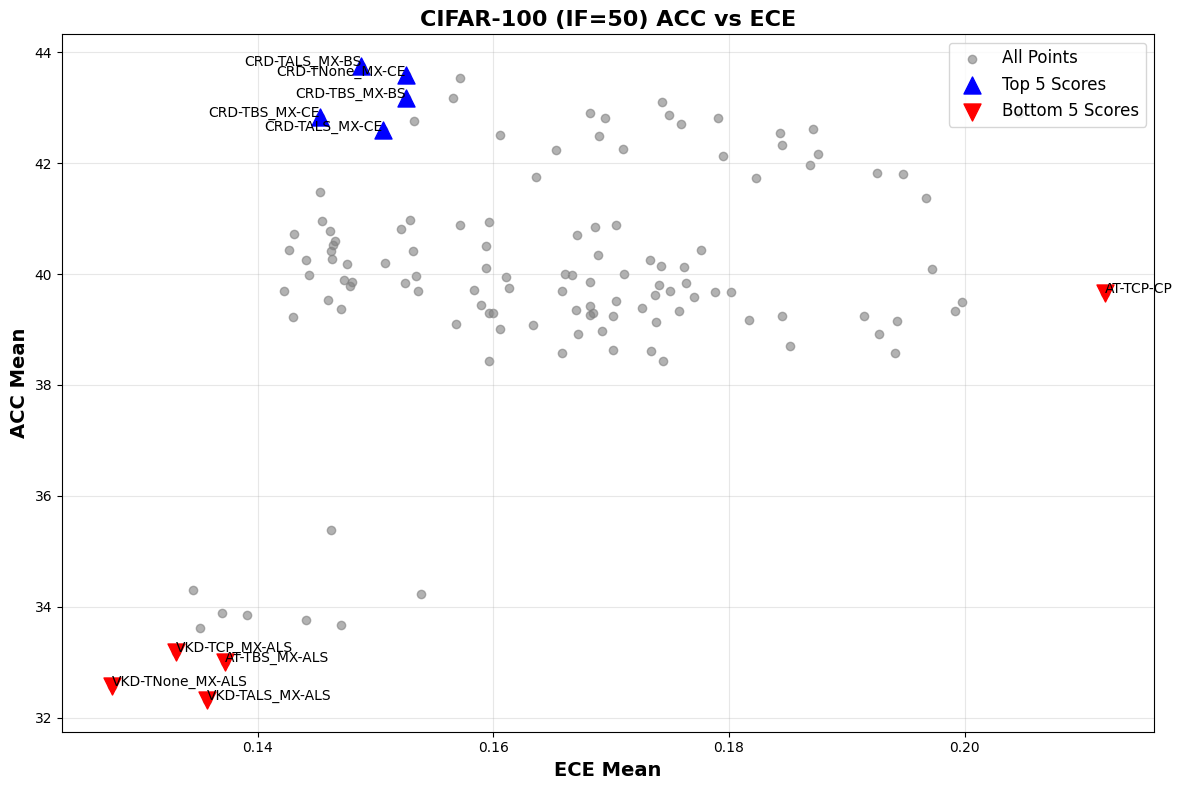

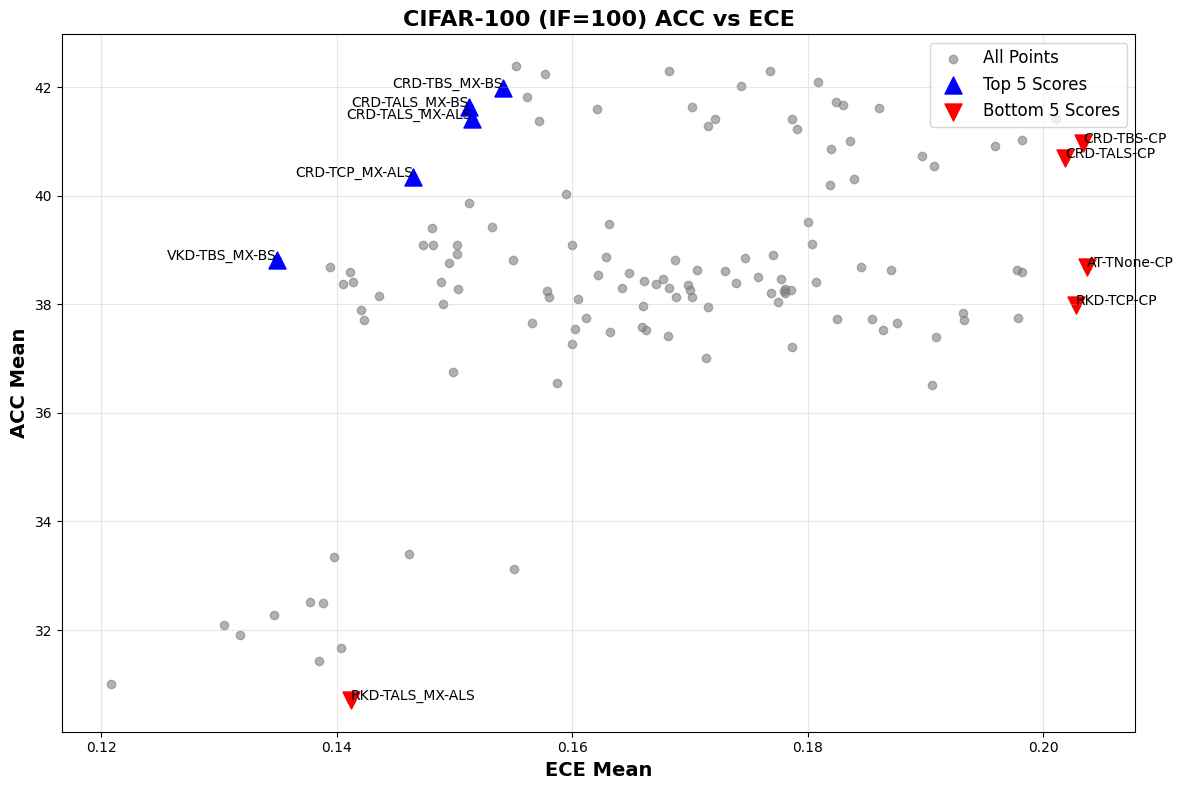

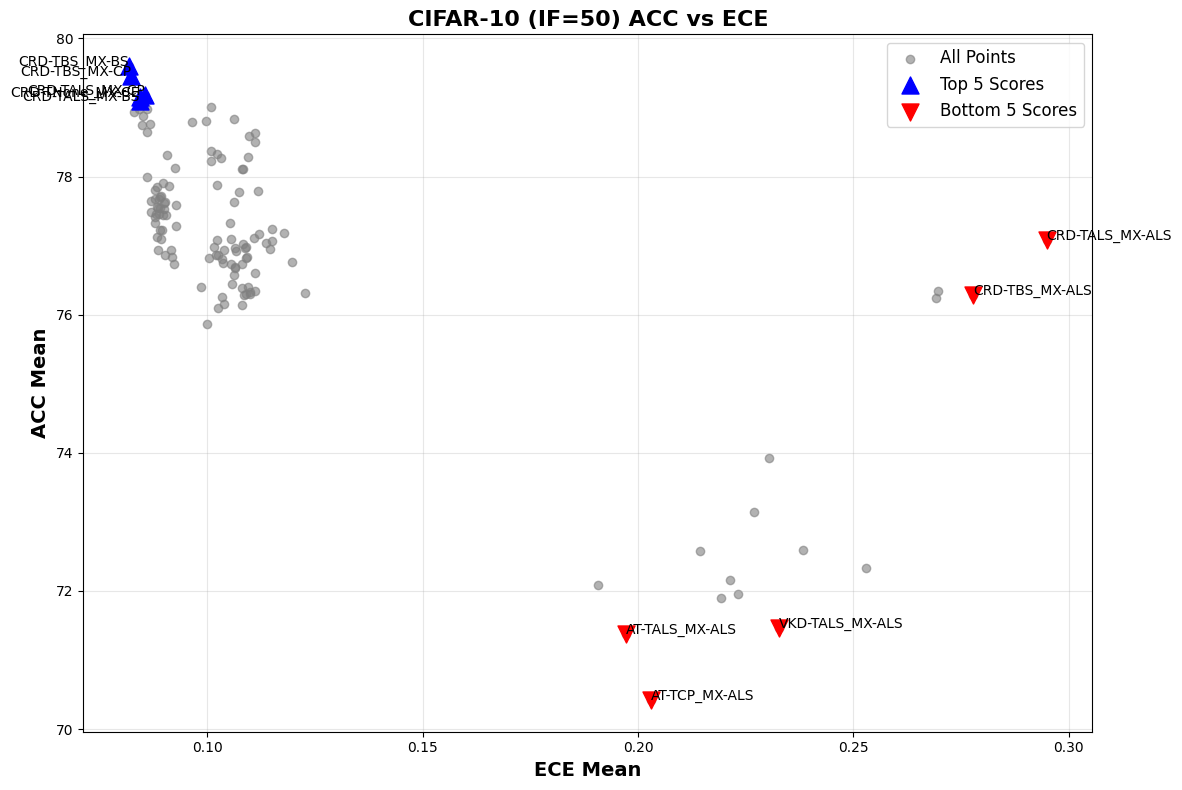

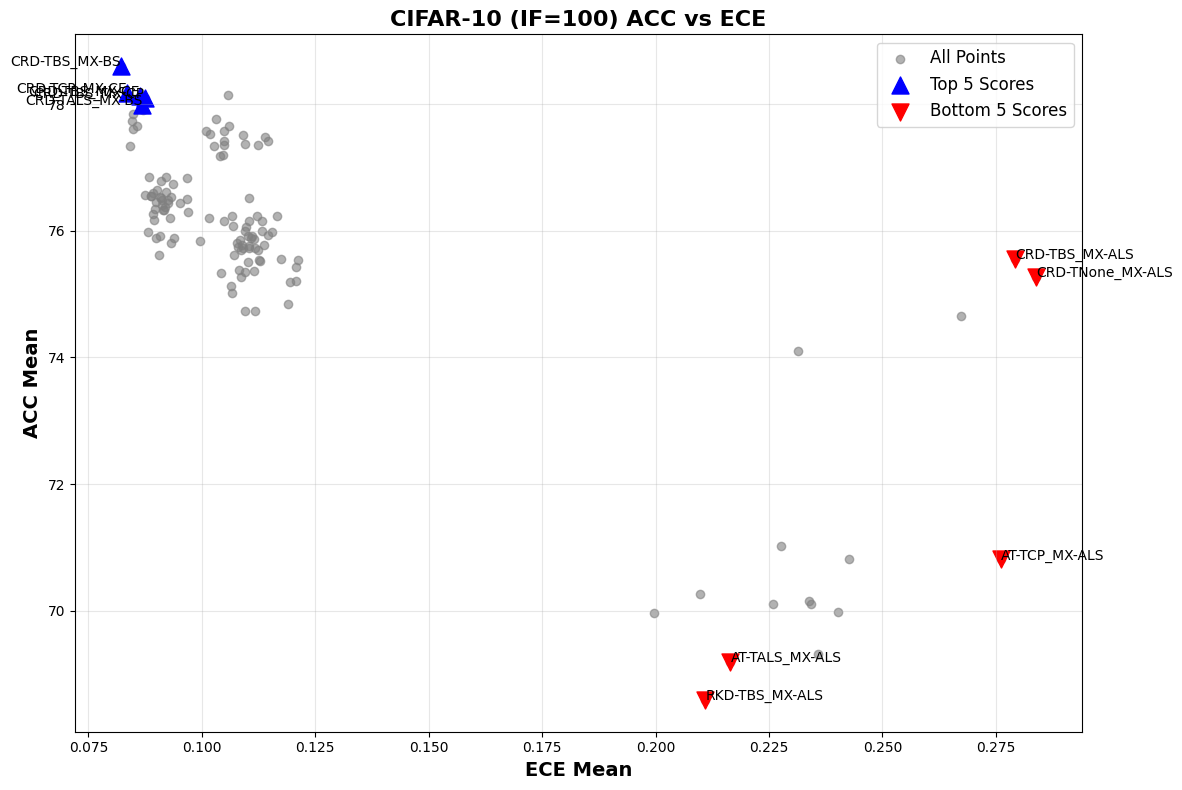

In [25]:
import matplotlib.pyplot as plt

# 데이터셋별로 분리하여 그래프 생성
def plot_dataset(df, top_5_normalized, bottom_5_normalized, dataset_name):
    plt.figure(figsize=(12, 8))

    # 모든 데이터 포인트 표시
    plt.scatter(df["ECE Mean"], df["ACC Mean"], color="gray", alpha=0.6, label="All Points")

    # Top 5 Harmonic Scores 강조
    plt.scatter(top_5_normalized["ECE Mean"], top_5_normalized["ACC Mean"], 
                color="blue", marker="^", s=150, label="Top 5 Scores")
    for _, row in top_5_normalized.iterrows():
        student_calibration_abbr = {
            "ALS": "ALS",
            "BalancedSoftmax": "BS",
            "ConfidencePenalty": "CP",
            "CE": "CE"
        }.get(row["Student Calibration"], row["Student Calibration"])
        label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
        plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right")

    # Bottom 5 Harmonic Scores 강조
    plt.scatter(bottom_5_normalized["ECE Mean"], bottom_5_normalized["ACC Mean"], 
                color="red", marker="v", s=150, label="Bottom 5 Scores")
    for _, row in bottom_5_normalized.iterrows():
        student_calibration_abbr = {
            "ALS": "ALS",
            "BalancedSoftmax": "BS",
            "ConfidencePenalty": "CP",
            "CE": "CE"
        }.get(row["Student Calibration"], row["Student Calibration"])
        label = f"{row['KD Method']}-{row['Teacher Calibration']}-{student_calibration_abbr}"
        plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="left")

    # 그래프 설정
    plt.title(f"{dataset_name} ACC vs ECE", fontsize=16, fontweight="bold")
    plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
    plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
    plt.grid(alpha=0.3)
    plt.legend(fontsize=12, loc="upper right")
    plt.tight_layout()

    # 그래프 표시
    plt.show()

# 데이터셋 정의
df_100_50 = dataframes["df_100_50"]
df_100_100 = dataframes["df_100_100"]
df_10_50 = dataframes["df_10_50"]
df_10_100 = dataframes["df_10_100"]

# 예제 데이터 준비 (필요시 데이터를 정확히 반영)
cifar_100_if_50 = df_100_50  # CIFAR-100 (IF=50) 데이터셋
cifar_100_if_100 = df_100_100  # CIFAR-100 (IF=100) 데이터셋
cifar_10_if_50 = df_10_50  # CIFAR-10 (IF=50) 데이터셋
cifar_10_if_100 = df_10_100  # CIFAR-10 (IF=100) 데이터셋

# 상위 5개와 하위 5개 데이터 정의
top_5_100_50 = cifar_100_if_50.nlargest(5, "Normalized Harmonic Score")
bottom_5_100_50 = cifar_100_if_50.nsmallest(5, "Normalized Harmonic Score")

top_5_100_100 = cifar_100_if_100.nlargest(5, "Normalized Harmonic Score")
bottom_5_100_100 = cifar_100_if_100.nsmallest(5, "Normalized Harmonic Score")

top_5_10_50 = cifar_10_if_50.nlargest(5, "Normalized Harmonic Score")
bottom_5_10_50 = cifar_10_if_50.nsmallest(5, "Normalized Harmonic Score")

top_5_10_100 = cifar_10_if_100.nlargest(5, "Normalized Harmonic Score")
bottom_5_10_100 = cifar_10_if_100.nsmallest(5, "Normalized Harmonic Score")

# 데이터셋별로 그래프 생성
plot_dataset(cifar_100_if_50, top_5_100_50, bottom_5_100_50, "CIFAR-100 (IF=50)")
plot_dataset(cifar_100_if_100, top_5_100_100, bottom_5_100_100, "CIFAR-100 (IF=100)")
plot_dataset(cifar_10_if_50, top_5_10_50, bottom_5_10_50, "CIFAR-10 (IF=50)")
plot_dataset(cifar_10_if_100, top_5_10_100, bottom_5_10_100, "CIFAR-10 (IF=100)")


Analyzing CIFAR-100 (IF=50)...

   Teacher Calibration Student Calibration  ACC Mean  ECE Mean  Harmonic Score
28            TNone_MX                 ALS   35.4475  0.137250        1.684501
30            TNone_MX                  CE   41.4275  0.145975        1.673550
5              TALS_MX                  BS   40.7375  0.146375        1.672210
20              TCP_MX                 ALS   35.5775  0.143975        1.671824
6              TALS_MX                  CE   40.5950  0.146825        1.671226
12              TBS_MX                 ALS   35.7200  0.145350        1.669358
22              TCP_MX                  CE   40.6750  0.149050        1.667025
29            TNone_MX                  BS   40.7450  0.149650        1.665932
14              TBS_MX                  CE   41.2250  0.150450        1.664793
4              TALS_MX                 ALS   35.7525  0.148300        1.663766
13              TBS_MX                  BS   41.0325  0.151025        1.663531
21              TCP_

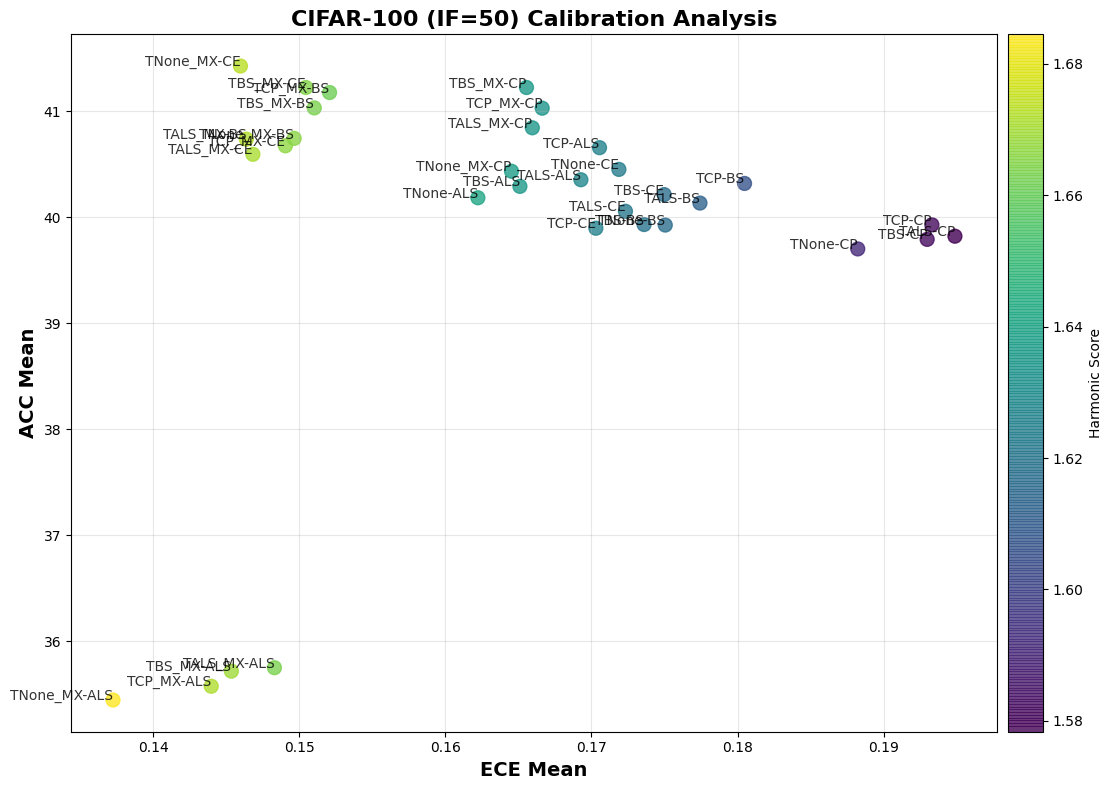

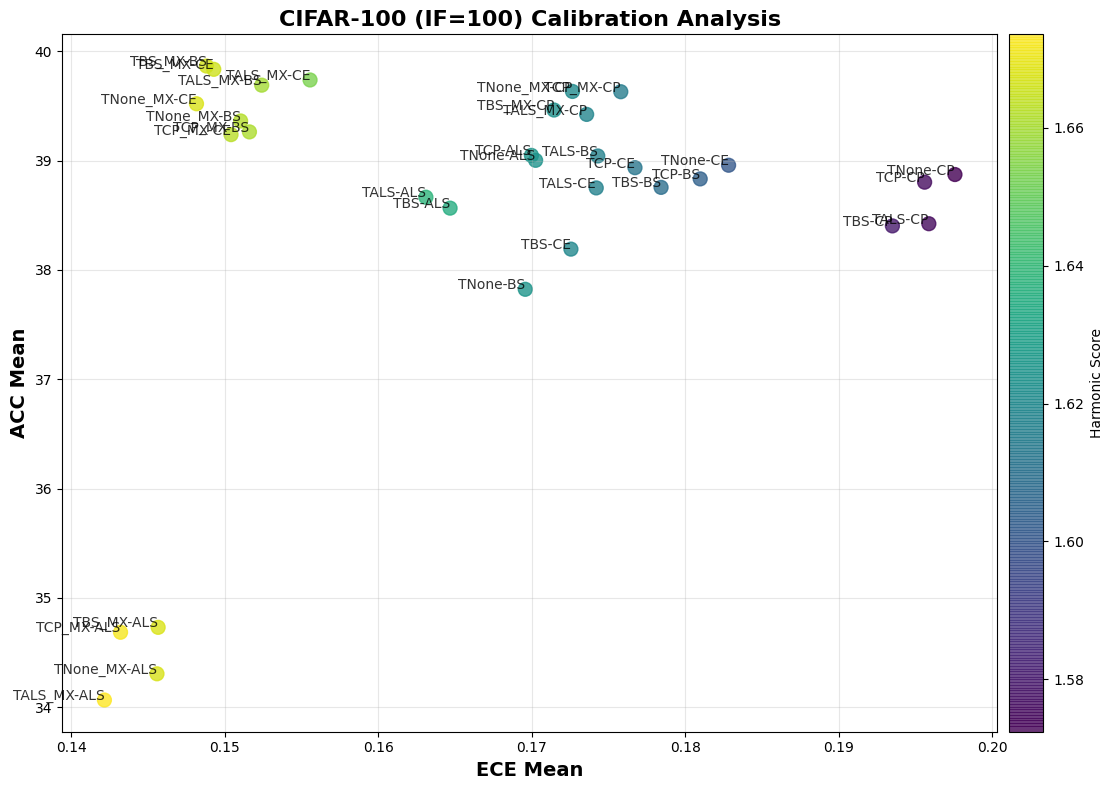

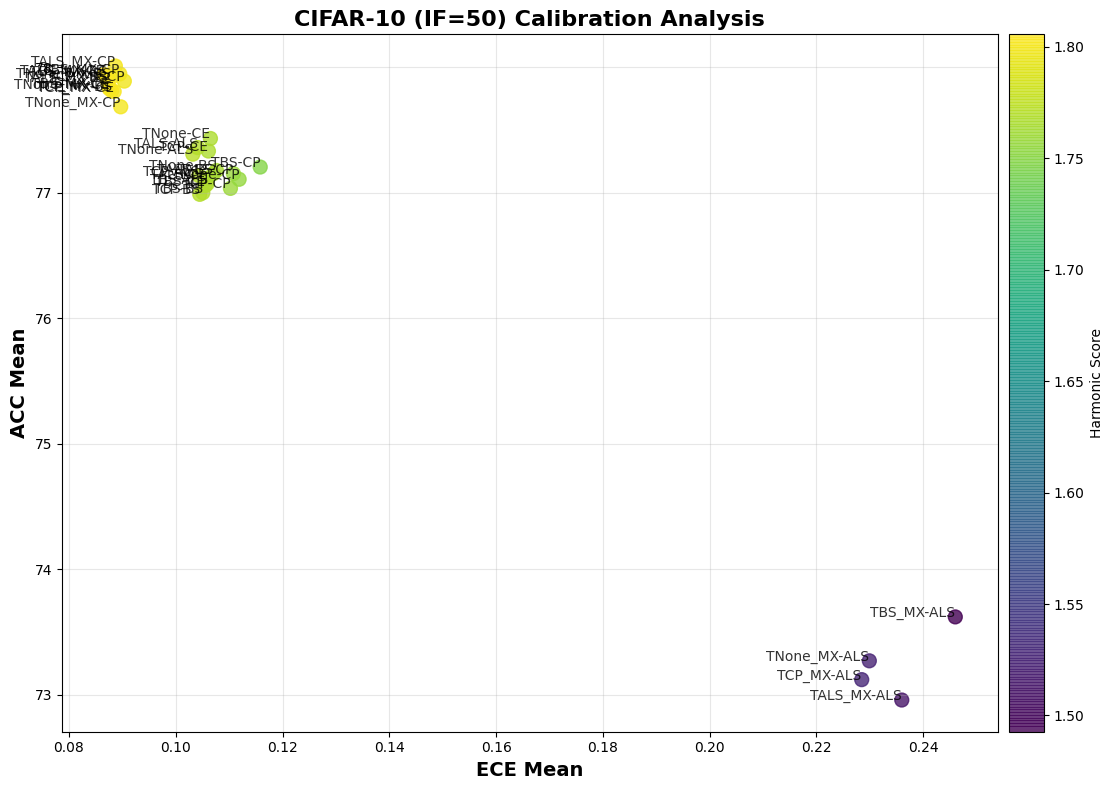

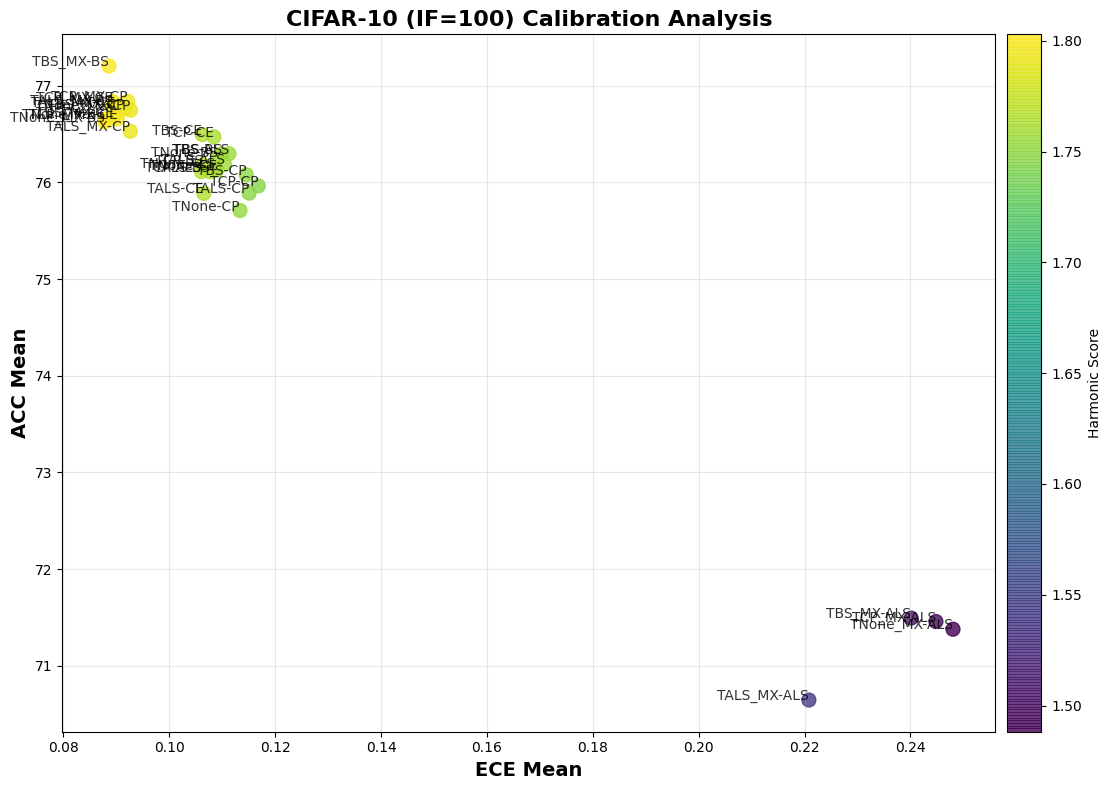

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드 및 정리 (데이터프레임은 이미 준비된 상태라 가정)
datasets = {
    "CIFAR-100 (IF=50)": cifar_100_if_50,
    "CIFAR-100 (IF=100)": cifar_100_if_100,
    "CIFAR-10 (IF=50)": cifar_10_if_50,
    "CIFAR-10 (IF=100)": cifar_10_if_100,
}

# 결과 저장용 딕셔너리
calibration_analysis_results = {}

# Calibration 기법별 분석
for dataset_name, df in datasets.items():
    print(f"Analyzing {dataset_name}...\n")

    # Calibration 기법별 그룹화 및 평균 계산
    calibration_groups = df.groupby(["Teacher Calibration", "Student Calibration"])
    calibration_stats = calibration_groups[["ACC Mean", "ECE Mean"]].mean().reset_index()

    # Normalized Harmonic Score 계산
    calibration_stats["Harmonic Score"] = (
        2 * calibration_stats["ACC Mean"] * (1 - calibration_stats["ECE Mean"]) /
        (calibration_stats["ACC Mean"] + (1 - calibration_stats["ECE Mean"]))
    )

    # 정렬
    calibration_stats = calibration_stats.sort_values(by="Harmonic Score", ascending=False)

    # 결과 저장
    calibration_analysis_results[dataset_name] = calibration_stats

    # 결과 출력
    print(calibration_stats)
    print("\n")

# 시각화 함수
def plot_calibration_results(calibration_stats, dataset_name):
    plt.figure(figsize=(12, 8))

    # 산점도 (ECE vs ACC)
    plt.scatter(calibration_stats["ECE Mean"], calibration_stats["ACC Mean"], 
                c=calibration_stats["Harmonic Score"], cmap="viridis", s=100, alpha=0.8)
    
    # 레이블 추가
    for _, row in calibration_stats.iterrows():
        label = f"{row['Teacher Calibration']}-{row['Student Calibration']}"
        plt.text(row["ECE Mean"], row["ACC Mean"], label, fontsize=10, ha="right", alpha=0.8)

    # 그래프 설정
    plt.title(f"{dataset_name} Calibration Analysis", fontsize=16, fontweight="bold")
    plt.xlabel("ECE Mean", fontsize=14, fontweight="bold")
    plt.ylabel("ACC Mean", fontsize=14, fontweight="bold")
    plt.colorbar(label="Harmonic Score", pad=0.01)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# 각 데이터셋에 대해 그래프 생성
for dataset_name, stats in calibration_analysis_results.items():
    plot_calibration_results(stats, dataset_name)


In [28]:
def analyze_kd_methods(df, kd_methods):
    """
    KD 기법별로 ACC Mean, ECE Mean의 평균값 계산.
    """
    results = {}
    for method in kd_methods:
        specific_kd = df[df["KD Method"] == method]
        results[method] = {
            "ACC Mean": specific_kd["ACC Mean"].mean(),
            "ECE Mean": specific_kd["ECE Mean"].mean(),
            "Harmonic Score Mean": specific_kd["Harmonic Score"].mean()
        }
    return results

# CIFAR-100 (IF=50)을 기준으로 KD 기법 비교
kd_methods = ["Vanilla KD", "CRD", "RKD", "AT"]

cifar_100_if_50_results = analyze_kd_methods(cifar_100_if_50, kd_methods)

# 결과 출력
for method, metrics in cifar_100_if_50_results.items():
    print(f"KD Method: {method}")
    print(f"ACC Mean: {metrics['ACC Mean']:.2f}")
    print(f"ECE Mean: {metrics['ECE Mean']:.4f}")
    print(f"Harmonic Score Mean: {metrics['Harmonic Score Mean']:.4f}\n")


KeyError: 'Harmonic Score'